In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import xarray
import rioxarray

### Basic Parameter

In [2]:
path = r"/uba/anemos_winddata/20191029_anemosDataFull/UBA-Windatlas/"
wind_data_type = r"3arcsecs/"

# Testimport 

In [10]:
variable = "rho"
level = 120
data = f"D-3km.E5.3arcsecs.{variable}.{level}m.2009-2018.tif"
all_data = "D-3km.E5.3arcsecs.{variable}.*.2009-2018.z0.tif"
data_path = path + wind_data_type + data


data_geotiff = xarray.open_dataarray(data_path, engine="rasterio", masked=True)
#data_geotiff = rioxarray.open_rasterio(data_path, masked=True)

# Covert our xarray.DataArray into a xarray.Dataset
data_geotiff = data_geotiff.to_dataset('band')
# Rename the variable to a more useful name
data_geotiff = data_geotiff.rename({1: variable})

data_geotiff

<xarray.Dataset>
Dimensions:      (y: 11412, x: 12276)
Coordinates:
  * x            (x) float64 5.2 5.201 5.202 5.203 ... 15.43 15.43 15.43 15.43
  * y            (y) float64 56.71 56.71 56.71 56.71 ... 47.2 47.2 47.2 47.2
    spatial_ref  int64 ...
Data variables:
    rho          (y, x) float64 ...
Attributes:
    long_name:  Mean Air Density 2009-2018
    units:      m/s

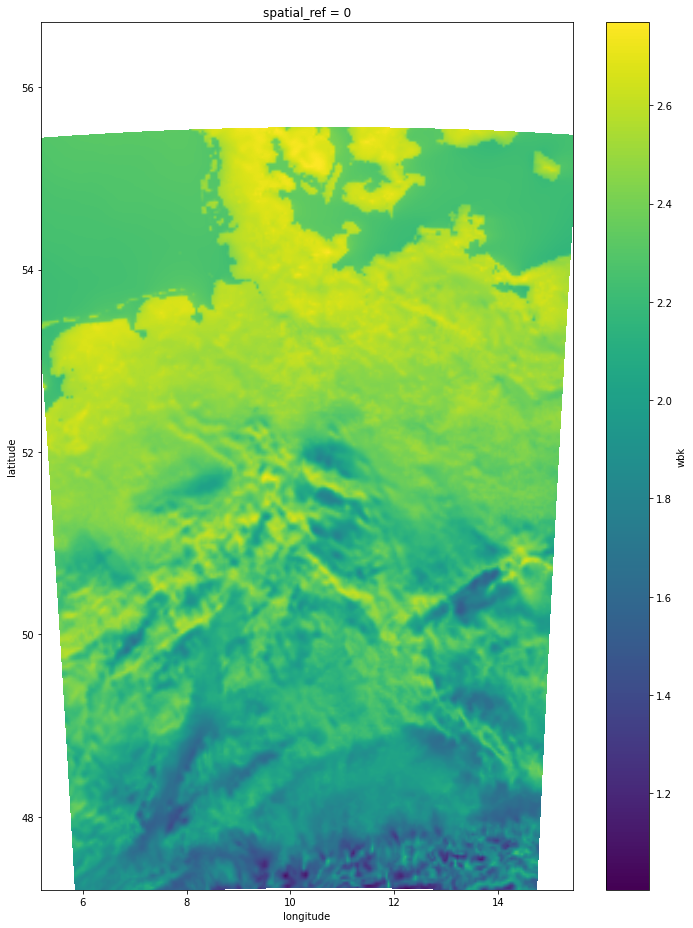

In [4]:
data_geotiff[variable].plot(figsize=(10,13))
#plt.title(data_geotiff.attrs.get("description") + " at 120m and 90m resolution")
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.tight_layout()
plt.show()

# Pointextraction

In [7]:
size = 10
lon = np.around(np.random.uniform(6.0, 14.0, size=size),5)
lat = np.around(np.random.uniform(48.0, 55.0, size=size),5)
lat_lon_coor = np.stack((lat, lon), axis=1)
level = np.around(np.random.uniform(80.0, 140.0, size=size),1)

# Nearest
nearest = data_geotiff.sel(
        x=xarray.DataArray(lon, dims='wea'), 
        y=xarray.DataArray(lat, dims='wea'), 
        method="nearest")[variable]

# Linear Interpolation
linear = data_geotiff.interp(
        x=xarray.DataArray(lon, dims='wea'), 
        y=xarray.DataArray(lat, dims='wea'), 
        method="linear")[variable]

print(f"Nearest value to desired coordinate: {np.around(nearest.values, 6)}")
print(f"Linear interpolated value to desired coordinate: {np.around(linear.values, 6)}")
print(f"Difference: {abs(np.around(nearest.values, 4) - np.around(linear.values, 6))}")

Nearest value to desired coordinate: [2.415815 1.999063 2.415633 2.029799 2.041595 2.590512 2.258902 2.254524
 1.856625 1.841577]
Linear interpolated value to desired coordinate: [2.415236 1.999636 2.416131 2.030035 2.041886 2.590528 2.258815 2.254522
 1.856936 1.841088]
Difference: [5.64e-04 5.36e-04 5.31e-04 2.35e-04 2.86e-04 2.80e-05 8.50e-05 2.20e-05
 3.36e-04 5.12e-04]


# Old

In [ ]:
def Weibull(
    windspeed: np.array,
    k: float,
    A: float):
    """
    """
    return k/A*(windspeed/A)**(k-1)*np.exp(-(windspeed/A)**k)

def WeibullIntegral(
    windspeed: np.array,
    k: float,
    A: float):
    """
    """
    return -np.exp(-(windspeed**k)/(A**k))

def windspeedArray(
    increment:float,
    start:float = 0.,
    end:float = 26.):
    """
    """
    num = int((end-start)/increment) + 1
    return np.linspace(0.,26.,num=num)

In [ ]:
# Windspeed generater
ws = windspeedArray(increment=0.0001)

# Weibull generator
wb = Weibull(windspeed=ws, k=2., A=6.) * 100

plt.plot(ws, wb)